## Explorando o dataset breast_msk_2018_clinical_data

In [1]:
import pandas as pd

In [2]:
# carregando o dataset
breast_msk = pd.read_csv('../data/breast_msk_2018_clinical_data.tsv', sep='\t')

In [18]:
# temos 1918 registros e 57 colunas nesse dataset
breast_msk.shape

(1918, 57)

In [20]:
# dando uma olhada nos campos
breast_msk.head()

,Study ID,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,Disease Free Event,Disease Free (Months),ER PCT Primary,ER Status of Sequenced Sample,ER Status of the Primary,...,Number of Samples Per Patient,Site of Sample,Sample Type,Sex,Stage At Diagnosis,Time To Death (Months),Tumor Sample Histology,Tumor Tissue Origin,T Stage,Patient's Vital Status
0,breast_msk_2018,P-0000004,P-0000004-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,1,1.1,70,Positive,Positive,...,1,Treatment Naive Primary,Primary,Female,IV,NaN,Breast Invasive Ductal Carcinoma,Breast,T1c,Alive
1,breast_msk_2018,P-0000012,P-0000012-T02-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,0,218.0,0,Negative,Negative,...,1,Treatment Naive Primary,Primary,Female,IIA,NaN,Breast Invasive Ductal Carcinoma,Breast,T2,Alive
2,breast_msk_2018,P-0000015,P-0000015-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,1,68.9,90,Positive,Positive,...,1,Liver,Metastasis,Female,IB,548.0,Breast Invasive Ductal Carcinoma,Breast,T1b,Deceased
3,breast_msk_2018,P-0000041,P-0000041-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,1,90.2,50,Positive,Positive,...,1,Breast,Metastasis,Female,IA,637.0,Breast Invasive Ductal Carcinoma,Breast,T1b,Deceased
4,breast_msk_2018,P-0000057,P-0000057-T01-IM3,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,1,0.5,80,Positive,Positive,...,1,Post-Treatment Primary,Primary,Female,IV,522.0,Breast Mixed Ductal and Lobular Carcinoma,Breast,TX,Deceased


In [25]:
breast_msk['Disease Free Event'].unique()

array([1, 0], dtype=int64)

In [24]:
breast_msk.iloc[2]

Study ID                                                                breast_msk_2018
Patient ID                                                                    P-0000015
Sample ID                                                             P-0000015-T01-IM3
Cancer Type                                                               Breast Cancer
Cancer Type Detailed                                   Breast Invasive Ductal Carcinoma
Disease Free Event                                                                    1
Disease Free (Months)                                                              68.9
ER PCT Primary                                                                       90
ER Status of Sequenced Sample                                                  Positive
ER Status of the Primary                                                       Positive
Fraction Genome Altered                                                             NaN
HER2 FISH Status of Sequenced Sa

In [22]:
# a maior parte das colunas são em texto
breast_msk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 57 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Study ID                                       1918 non-null   object 
 1   Patient ID                                     1918 non-null   object 
 2   Sample ID                                      1918 non-null   object 
 3   Cancer Type                                    1918 non-null   object 
 4   Cancer Type Detailed                           1918 non-null   object 
 5   Disease Free Event                             1918 non-null   int64  
 6   Disease Free (Months)                          1918 non-null   float64
 7   ER PCT Primary                                 1709 non-null   object 
 8   ER Status of Sequenced Sample                  1918 non-null   object 
 9   ER Status of the Primary                       1918 

In [112]:
# colunas com mais dados nulos
breast_msk.isna().sum().sort_values(ascending=False)

HER2 FISH Ratio Value of Sequenced Sample        1524
Time To Death (Months)                           1496
HER2 FISH Status of Sequenced Sample             1413
HER2 FISH Ratio Primary                          1320
HER2 FISH Status (Report and ASCO) of Primary    1184
Metastatic Recurrence Time                        512
ER PCT Primary                                    209
PR PCT Primary                                    192
HER2 IHC Score Primary                            129
HER2 IHC Score of Sequenced Sample                110
Mutation Count                                     84
Fraction Genome Altered                            22
HER2 IHC Status of Sequenced Sample                 0
Menopausal Status At Diagnosis                      0
Primary Tumor Laterality                            0
Last Communication Contact                          0
Time to Diagnosis Invasive Carcinoma                0
Invasive Carcinoma Diagnosis Age                    0
Overall HR Status of Sequenc

In [92]:
import seaborn as sns

In [100]:
nomes_colunas = breast_msk.isna().sum().sort_values(ascending=False).index

In [101]:
valores_colunas = breast_msk.isna().sum().sort_values(ascending=False).values

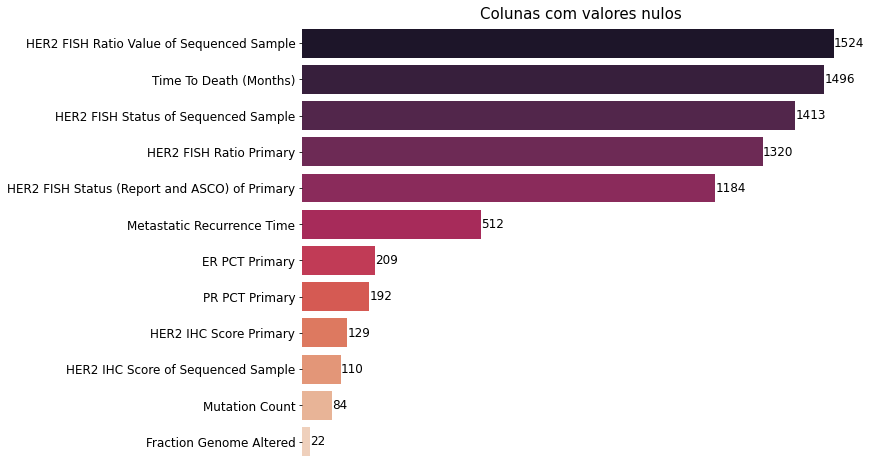

In [266]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 8))
plt.title('Colunas com valores nulos', fontsize=15)
barras_nulos = sns.barplot(x=valores_colunas[:12], y=nomes_colunas[:12], palette="rocket")
barras_nulos.tick_params(labelsize=12);
for barra in barras_nulos.patches:
    tamanho = barra.get_width()
    barras_nulos.text(tamanho+1, barra.get_y() + barra.get_height()/2, 
                      round(tamanho), 
                      ha='left', va='center', fontsize=12)

barras_nulos.spines['right'].set_visible(False)
barras_nulos.spines['left'].set_visible(False)
barras_nulos.spines['top'].set_visible(False)
barras_nulos.spines['bottom'].set_visible(False)
barras_nulos.get_xaxis().set_visible(False)

In [13]:
breast_msk['HER2 FISH Ratio Value of Sequenced Sample'].describe()

count     394
unique     84
top       1.1
freq       79
Name: HER2 FISH Ratio Value of Sequenced Sample, dtype: object

In [14]:
breast_msk['HER2 FISH Ratio Value of Sequenced Sample'].unique()

array([nan, '0.24', '1.2', '1', '2 (CN 4.8)', '4', '2.9', '1.1',
       '4.0, CN 9.7', '1.7', '0.88', '2.3', 'Not done', '1.23', '2.5',
       '1.4', '1.8 (CN 7.5)', '0.75', '4.5', '1.5', '1.3',
       '3.2 (Heterogenous)', '1.7 (CN 6.2)', '0.9', '2 (CN 6.4)', '8.4',
       '6.3', '1.6', '7', 'Not done (decalcified)', '2.1 (CN 4.1)',
       '1.02', '2.6', '2.2', '3.4 (CN 7.2)', '2.1', '0.74', '1.28', '3.4',
       '0.94', '0.7', '1.2 (CN 2.4)', '0.8', '1.9 (CN 4.3)', '2', '3.3',
       '3.29', '4.3 (CN 14.3)', '1.21', '6.9', '1.37', '3.9',
       '2.1 (Heterogenous)', '3.7', '3.6', '1.24', '16.4', '1.8 (CN 5.3)',
       '1.3 (OSH, CN 2.0)', '1.6 (CN 6.6)', '1.46', '2.5 (CN 3)',
       '1.3 (OSH CN 4.2)', '16.6', '1.42', '1.4 (CN 4.8)', '4.9',
       '1.9 (CN 4.2)', '2.4 (heterogenous)', '3.2', '2 (CN 4.6)', '1.9',
       '0', '2.1 (CN 3.7)', '1.8', '2.5 (CN 4.6)', '1.18', '1.39',
       '2.4 (CN 5.9)', '4.8', '1.4 (CN 3.0) (same sample OSH 2.3)',
       '1.53', '5.4', '4.4', '1.81'], d

Olhando as relações entre as variáveis numéricas de acordo com o gênero:

<Figure size 720x576 with 0 Axes>

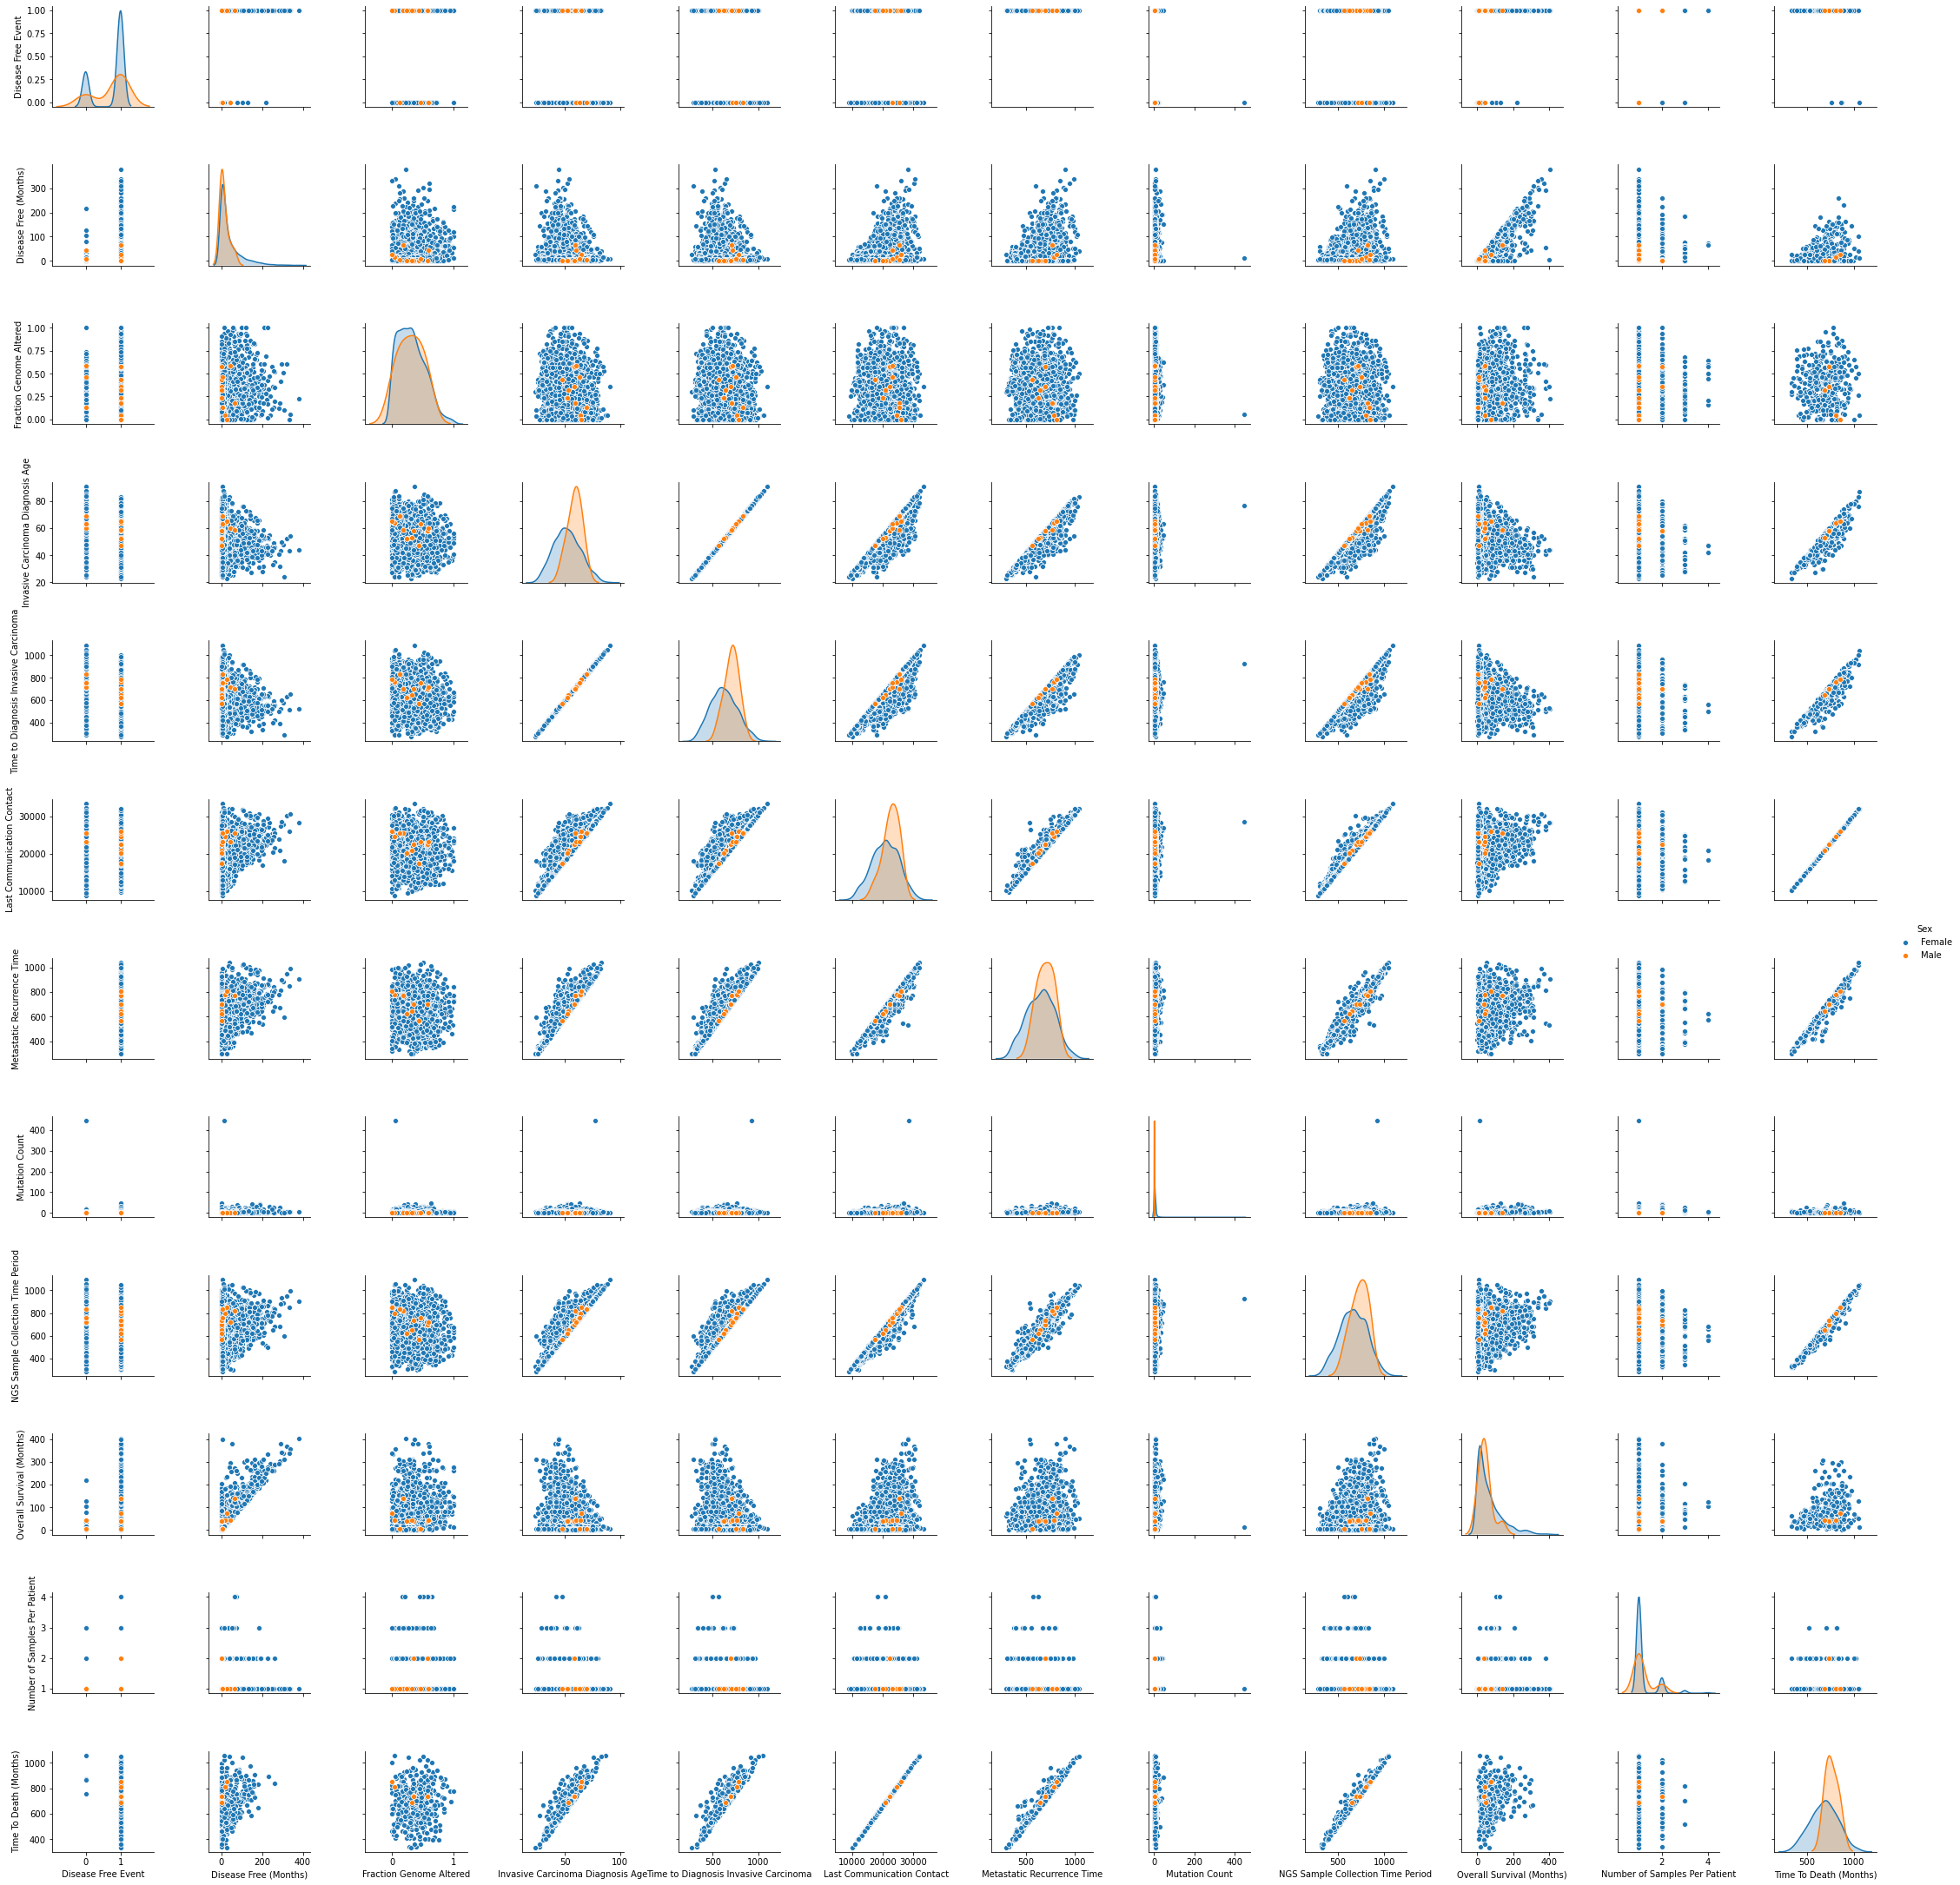

In [274]:
plt.figure(figsize=(10, 8))
sns.pairplot(breast_msk, hue='Sex');

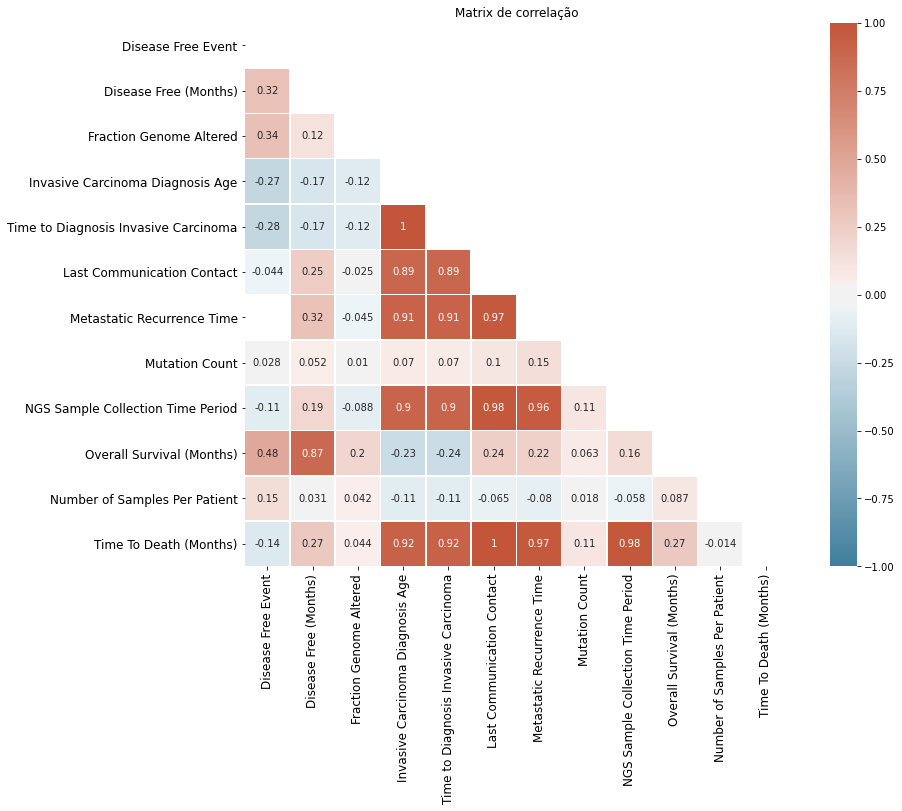

In [268]:
import numpy as np

# vendo a correlação entre as colunas
correlacao = breast_msk.corr()

mascara = np.triu(np.ones_like(correlacao, dtype=bool))
fig, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

matrix = sns.heatmap(correlacao, mask=mascara, cmap=cmap, annot=True, annot_kws={"fontsize":10},
                     center=0, square=True, vmin=-1, vmax=1, linewidths=.5)

matrix.set_title('Matrix de correlação', fontsize=12)
matrix.tick_params(labelsize=12);

<Figure size 720x576 with 0 Axes>

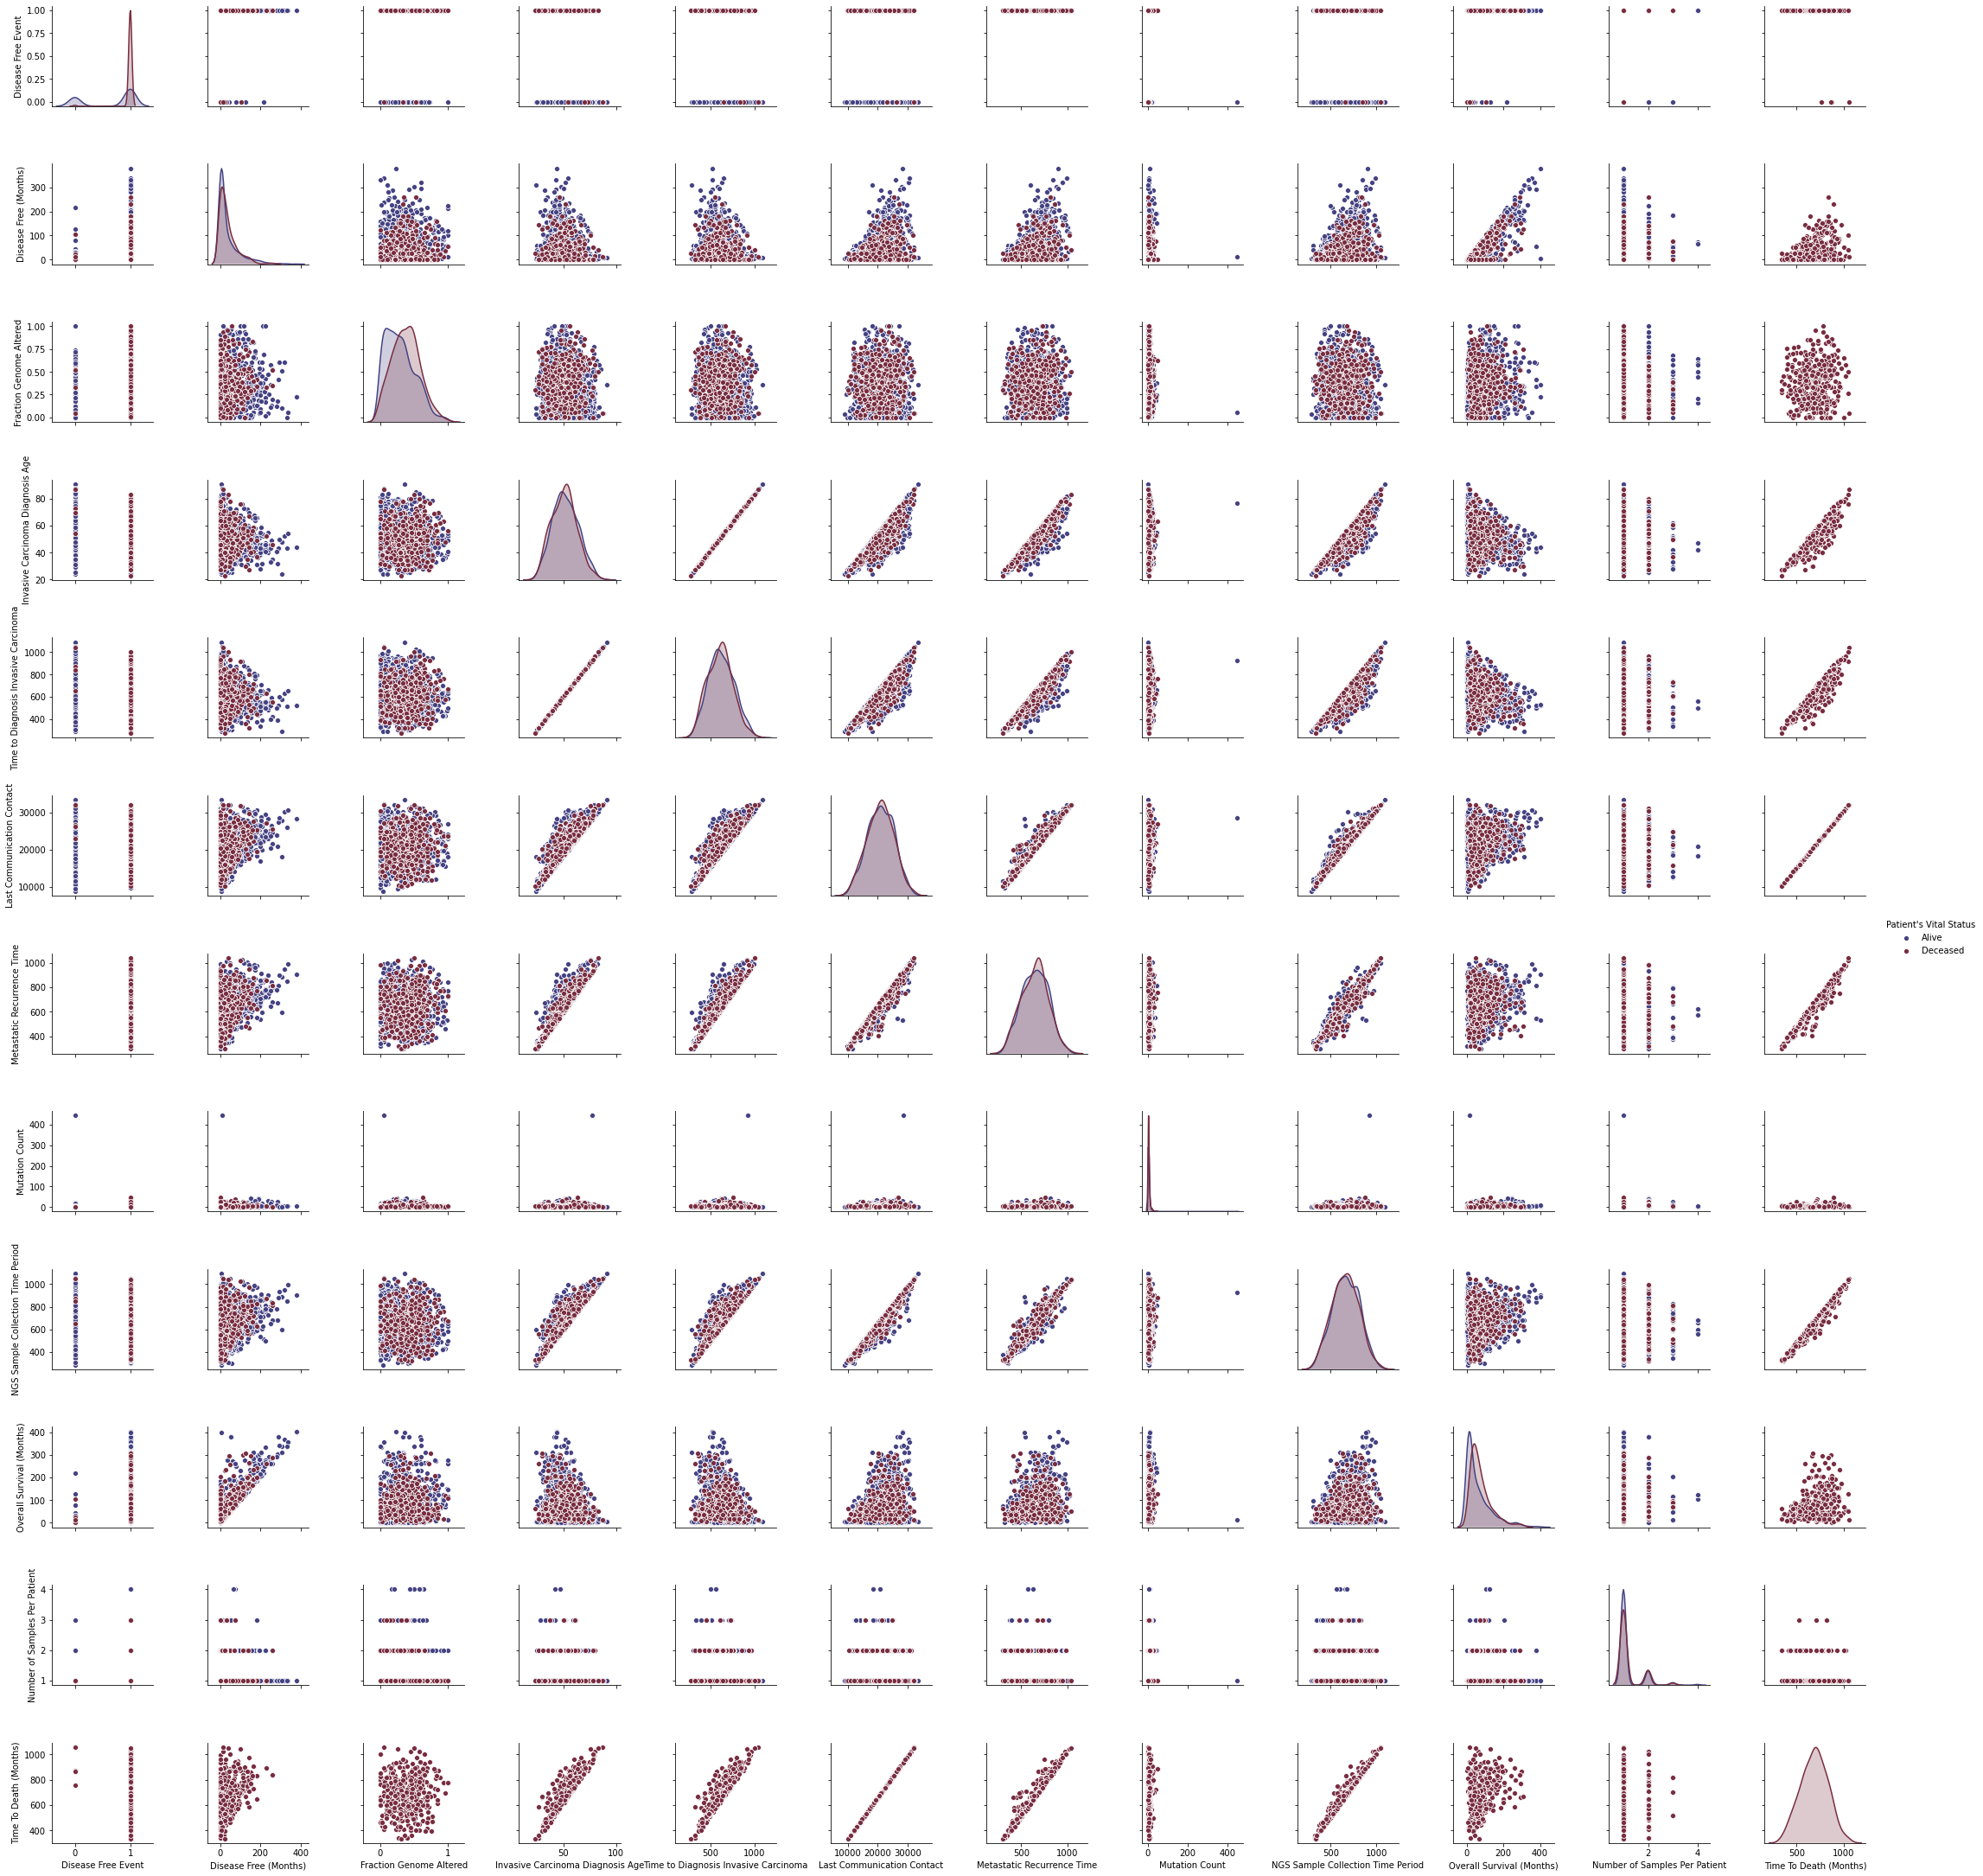

In [270]:
plt.figure(figsize=(10, 8))
sns.pairplot(breast_msk, hue="Patient's Vital Status", palette="icefire");

<Figure size 720x576 with 0 Axes>

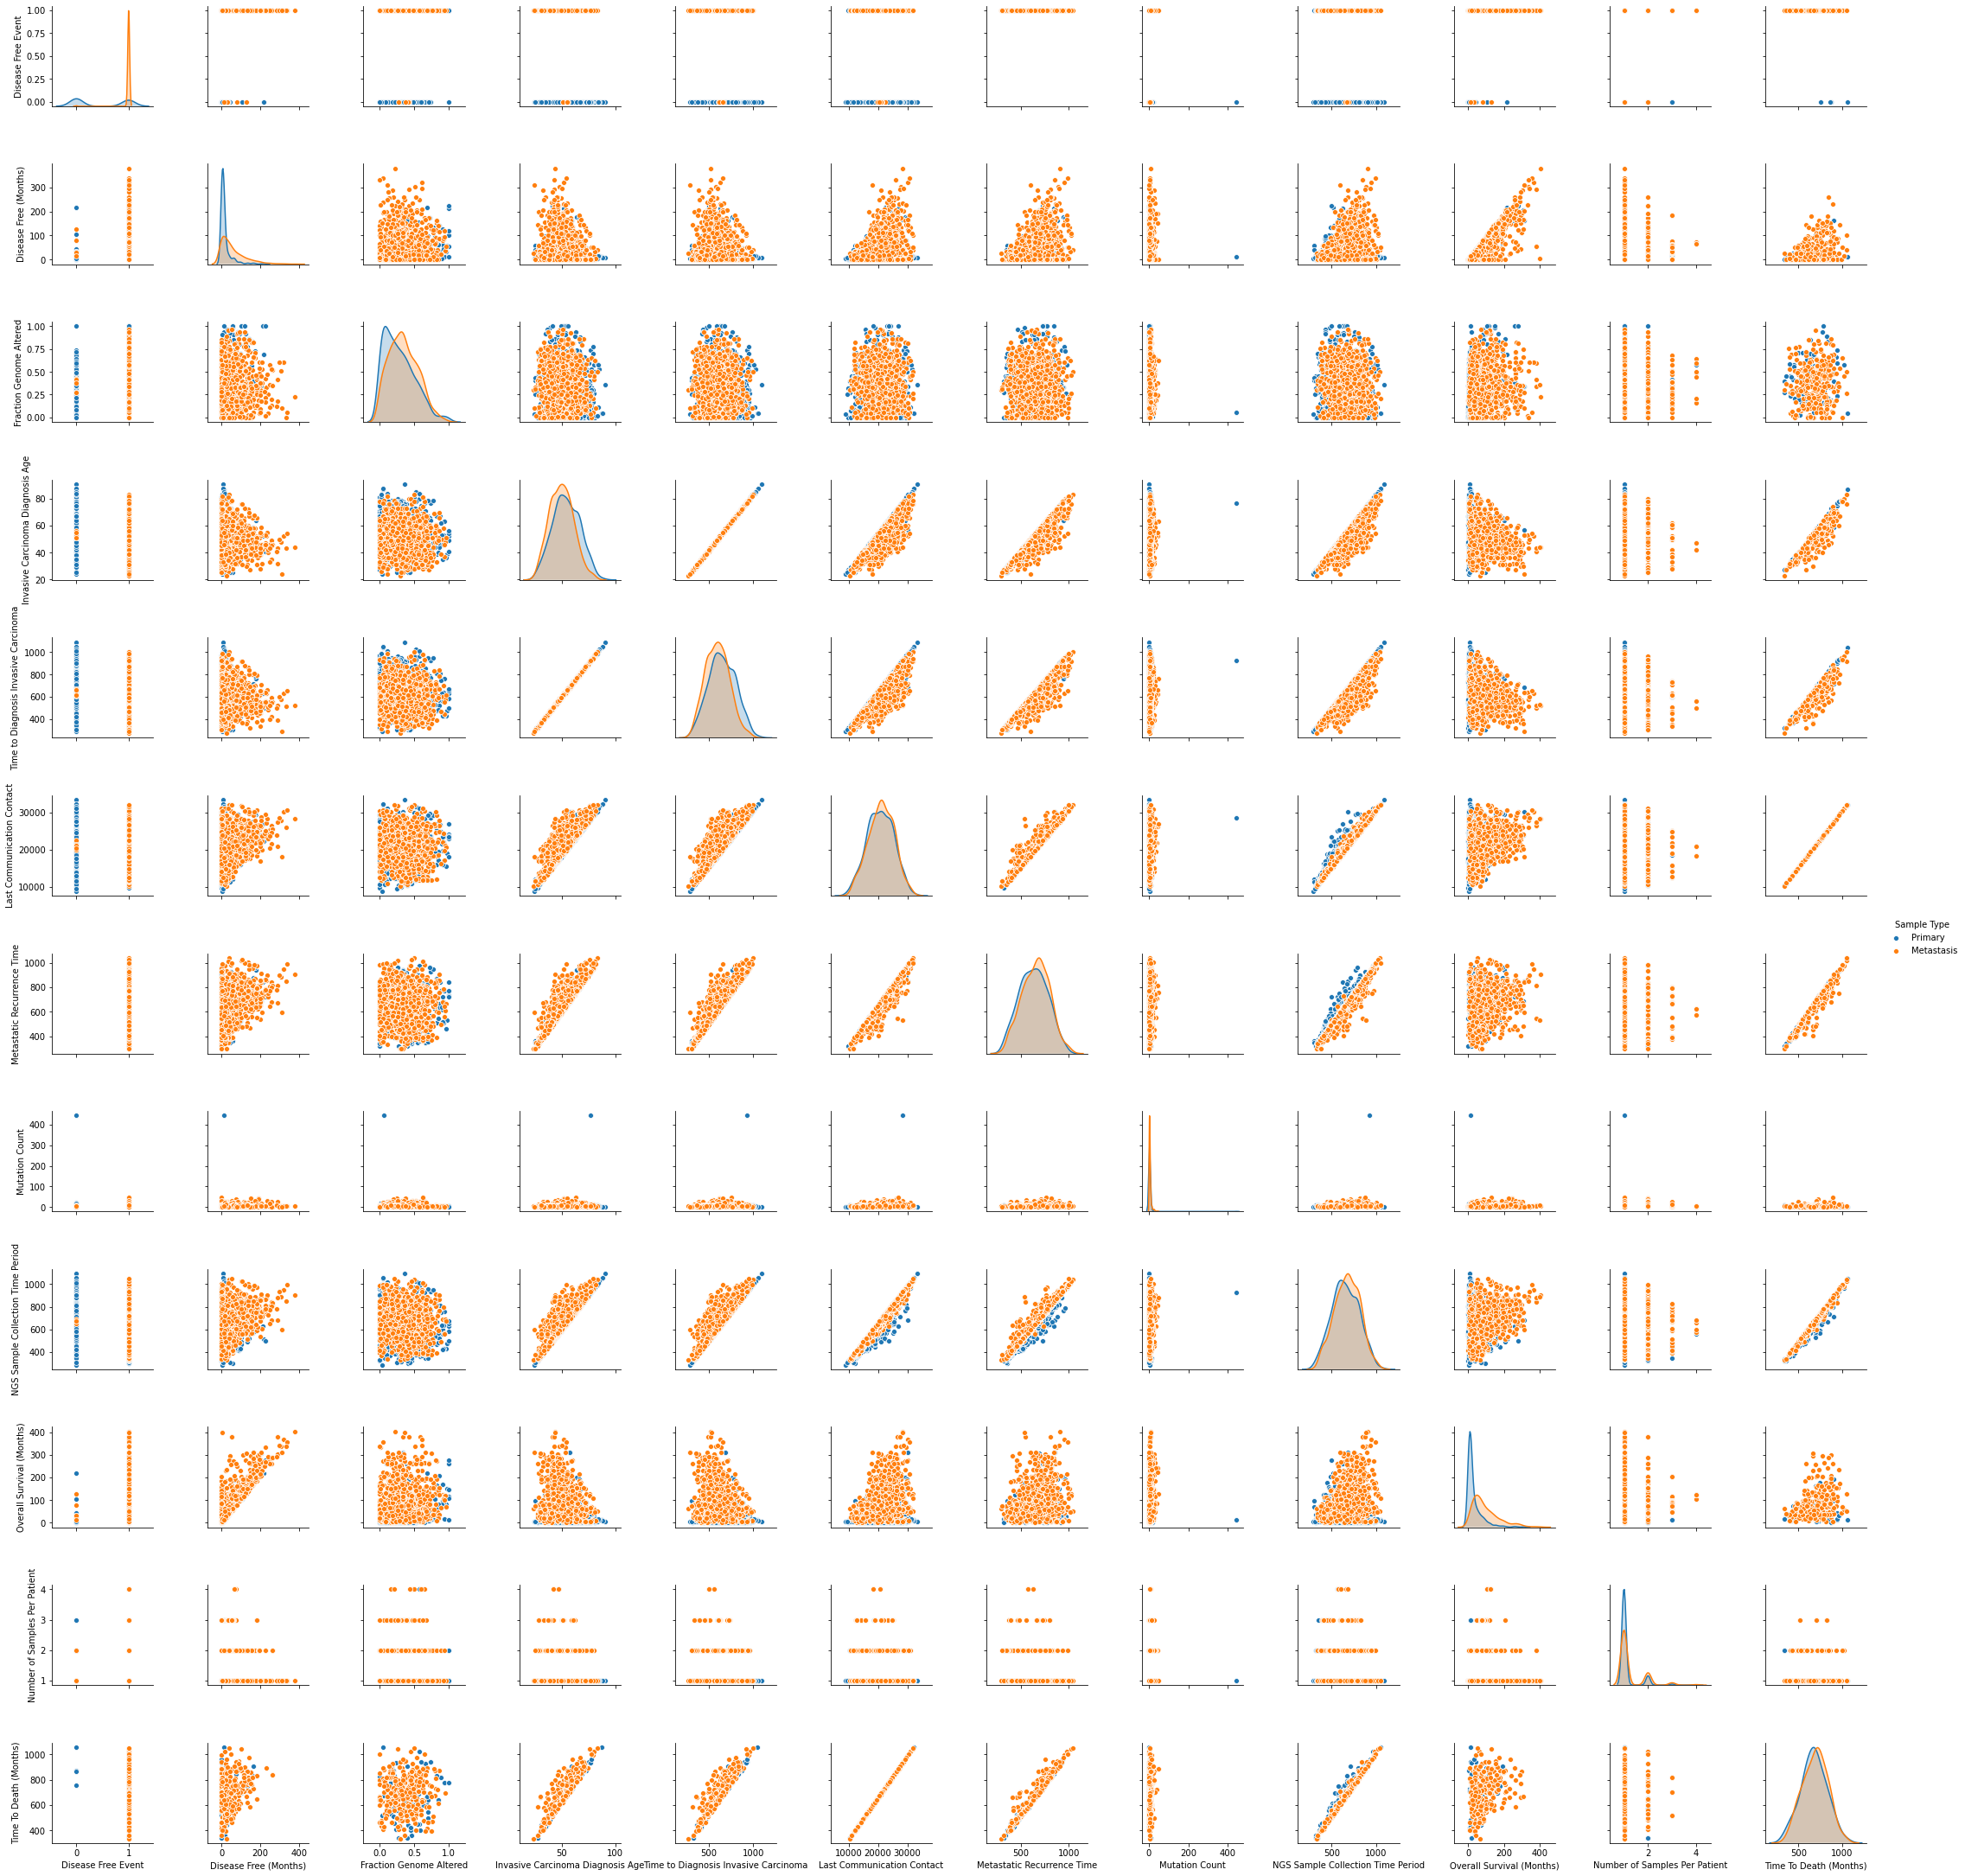

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
# paleta = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="dark")
sns.pairplot(breast_msk, hue='Sample Type');

In [275]:
breast_msk.describe().T

,count,mean,std,min,25%,50%,75%,max
Disease Free Event,1918.0,0.733055,0.442479,0.00,0.000000,1.00000,1.000000,1.00
Disease Free (Months),1918.0,39.094056,53.505631,0.00,4.300000,15.75000,53.175000,379.60
Fraction Genome Altered,1896.0,0.318959,0.218368,0.00,0.142475,0.29735,0.470575,1.00
Invasive Carcinoma Diagnosis Age,1918.0,51.965589,12.069693,23.00,43.000000,51.00000,60.000000,91.00
Time to Diagnosis Invasive Carcinoma,1918.0,624.478603,144.931298,271.51,517.987500,618.34000,724.160000,1092.47
Last Communication Contact,1918.0,20992.866006,4414.348721,8841.00,17900.750000,21082.50000,24293.000000,33407.00
Metastatic Recurrence Time,1406.0,649.968706,143.620002,297.00,545.000000,655.00000,754.000000,1041.00
Mutation Count,1834.0,5.034351,11.216338,1.00,2.000000,4.00000,6.000000,444.00
NGS Sample Collection Time Period,1918.0,666.134515,146.396524,288.00,563.250000,668.00000,778.750000,1093.00
Overall Survival (Months),1918.0,65.995255,69.222396,0.70,14.100000,43.20000,92.025000,403.70


In [4]:
breast_msk['Sex'].value_counts()

Female    1907
Male        11
Name: Sex, dtype: int64

In [6]:
breast_msk['Overall HER2 Status of Sequenced Sample'].unique()

array(['Negative', 'Positive', 'Unk/ND', 'Equivocal'], dtype=object)

In [7]:
for coluna in breast_msk:
    print(coluna, breast_msk[coluna].unique())
    print('\n')

Study ID ['breast_msk_2018']


Patient ID ['P-0000004' 'P-0000012' 'P-0000015' ... 'P-0019037' 'P-0019054'
 'P-0019073']


Sample ID ['P-0000004-T01-IM3' 'P-0000012-T02-IM3' 'P-0000015-T01-IM3' ...
 'P-0019037-T01-IM6' 'P-0019054-T01-IM6' 'P-0019073-T01-IM6']


Cancer Type ['Breast Cancer' 'Breast Cancer, NOS']


Cancer Type Detailed ['Breast Invasive Ductal Carcinoma'
 'Breast Mixed Ductal and Lobular Carcinoma'
 'Breast Invasive Lobular Carcinoma' 'Breast Invasive Cancer, NOS'
 'Breast Invasive Mixed Mucinous Carcinoma' 'Breast'
 'Metaplastic Breast Cancer' 'Invasive Breast Carcinoma'
 'Adenoid Cystic Breast Cancer']


Disease Free Event [1 0]


Disease Free (Months) [1.100e+00 2.180e+02 6.890e+01 9.020e+01 5.000e-01 0.000e+00 2.251e+02
 1.812e+02 1.354e+02 5.810e+01 1.900e+01 1.210e+01 1.032e+02 8.950e+01
 1.260e+01 1.850e+01 1.248e+02 3.730e+01 2.200e+01 9.000e-01 5.150e+01
 7.300e+01 1.400e+00 1.726e+02 3.000e-01 4.490e+01 5.230e+01 1.147e+02
 9.550e+01 1.000e+00 4.160e+01 4.400e+

Colunas que podem ser jogadas fora:
- Study ID
- Patient ID
- Sample ID
- Cancer Type
- Last Communication Contact
- Tumor Tissue Origin

In [ ]:
qual coluna que a gente vai prever: classificar, regressão ou se a gente vai usar clusterização 
    

In [19]:
len(breast_msk['Cancer Type Detailed'].unique())

9

In [20]:
breast_msk['Cancer Type Detailed'].unique()

array(['Breast Invasive Ductal Carcinoma',
       'Breast Mixed Ductal and Lobular Carcinoma',
       'Breast Invasive Lobular Carcinoma', 'Breast Invasive Cancer, NOS',
       'Breast Invasive Mixed Mucinous Carcinoma', 'Breast',
       'Metaplastic Breast Cancer', 'Invasive Breast Carcinoma',
       'Adenoid Cystic Breast Cancer'], dtype=object)